In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.shape

(891, 12)

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Checking null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Removing Cabin column as it has almost 70% null values
df = df.drop('Cabin', axis = 1)

In [ ]:
df.isna().sum()       #cabin column has been dropped

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
#replacing null values in age column with mean value
df['Age'].fillna(np.mean(df['Age']),inplace=True)

In [ ]:
df.isna().sum()     #Age column replaced with mean value so there are no null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
#replacing null values in embarked column with mode value
md = df.Embarked.mode()[0]
df['Embarked'].fillna(md, inplace=True)

In [ ]:
df.isna().sum()    #Embarked column filled with mode value

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.drop(['PassengerId', 'Name'], axis = 1, inplace=True)    #Dropping unwanted columns

In [ ]:
df.columns     #passengerid & Name column has been dropped

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


In [ ]:
#Encoding for character columns (sex, Embarked) because if those columns are not numbers the ml model catch the error
gender = pd.get_dummies(df['Sex'], drop_first=True)

In [ ]:
Embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [ ]:
df.drop(['Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [ ]:
df = pd.concat([df,gender,Embarked], axis=1)  #concat joins two or mode dataframes along a particular axis


In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


VISUAL ANALYSIS OF TITANIC


<Axes: xlabel='Survived', ylabel='count'>

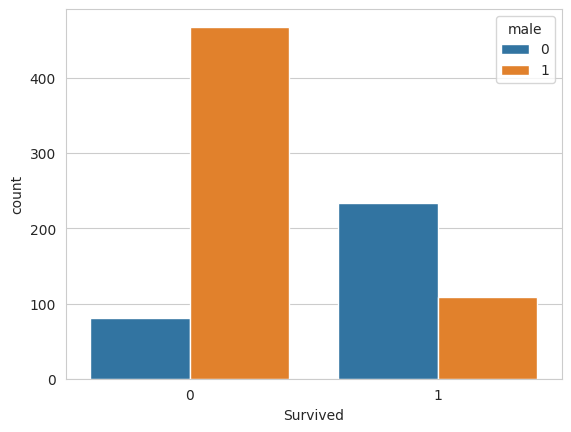

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='male', data=df)

<Axes: xlabel='Survived', ylabel='count'>

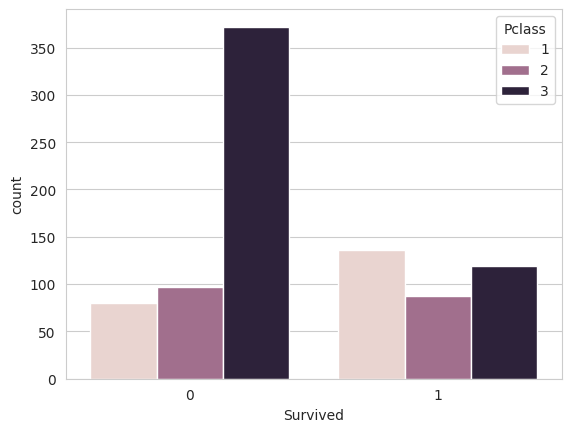

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

<Axes: >

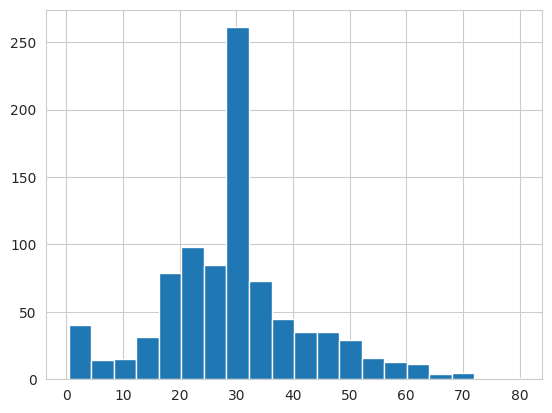

In [ ]:
#Frequency distribution of ages of passengers on Titanic
df['Age'].hist(bins=20)

<Axes: ylabel='male'>

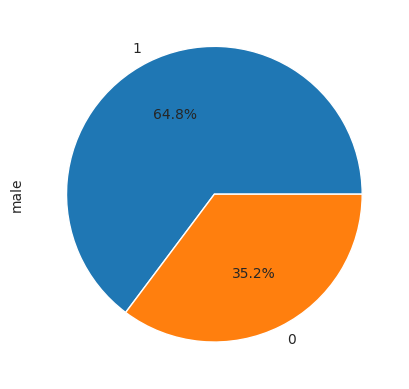

In [ ]:
df['male'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='Pclass'>

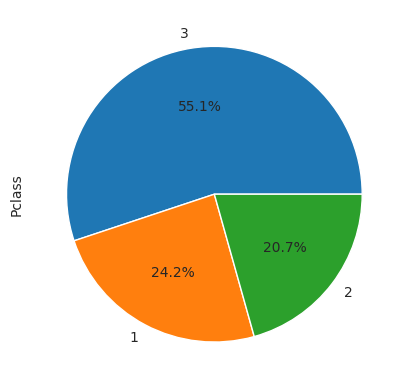

In [ ]:
df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


FEATURE SELECTION FOR APPLYING ML MODEL

In [ ]:
X = df.iloc[:,1:]
Y = df.Survived

#select features and Target where x is feature and y is target

In [ ]:
Y.shape

(891,)

In [ ]:
X.shape

(891, 8)

Split data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [ ]:
X_train.shape

(668, 8)

In [ ]:
X_test.shape

(223, 8)

In [ ]:
#Applying Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8116591928251121

In [ ]:
#Applying SVM(support vector machine)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)


SVC()

In [ ]:
y_pred = model.predict(X_test)
accuracy_score(Y_test, y_pred)

0.7040358744394619

In [ ]:
#Applying in KNN (K-nearestneighbour)
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
algo = KNeighborsClassifier()
algo.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
y_pred = algo.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7130044843049327

In [ ]:
#Applying Naive Bayes
from sklearn.naive_bayes import GaussianNB
algo = GaussianNB()
algo.fit(X_train,Y_train)

GaussianNB()

In [ ]:
algo.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7130044843049327

In [ ]:
#Applying logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)


#LogisticRegression giving highest accuracy score as almost 85%

0.852017937219731